# Prediccion de Default en Prestamos


Para este proyecto utilizaremos un sample de los datos de Lending Club. La idea es predecir si cierto usuario cometera Default basado en informacion que la plataforma recolecta. Esto nos ayudara a mejorar la metodologia/pipeline de prestamo.


# Descripcion



Contiene los prestamos de esta plataforma:

    periodo 2007-2017Q3.
    887mil observaciones, sample de 100mil
    150 variables
    Target: loan status



# Objetivo

Realizar un ETL y un EDA

## ETL

0. Limpia los datos de tal manera que al final del ETL queden en formato `tidy`.
1. Asegurate de cargar y leer los datos
2. Crea una tabla donde se guarde el nombre de la columna y el tipo de dato: (`column_name`,   `type`).
3. Asegurate de pensar cual es el tipo de dato correcto. Porque elejiste strig/object o float o int?. No hay respuestas incorrectas como tal, pero tienes que justificar tu decision.
4. Maneja missings o nans de la manera adecuada. Justifica cada decision







## EDA

0. Preparar lo datos para un pipeline de datos
1. Quitar columnas inservibles
2. Imputar valores
3. Mantener replicabildiad y reproducibilidad

**No olvides anotar tus justificaciones en celdas para recordar cuando te toque explicarlo.** Puedes agregar el numero de celdas que necesites para poner tu explicacion y el codigo, solo manten la estructura.

# ETL

In [26]:
import pandas as pd
import numpy as np

# Verificar versiobnes
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)



Pandas version: 2.2.2
NumPy version: 1.26.4


Vas a obtener 2 errores, solucionalo con los visto en clase.  
Tip: Se arreglan con argumentos adicionales de la funcion `read_csv`  
Documentacion: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [27]:
loans = pd.read_csv('https://github.com/sonder-art/fdd_prim_2023/blob/main/codigo/pandas/LoansData_sample.csv.gz?raw=true',
                    compression='gzip',
                    encoding='ISO-8859-1')

<ipython-input-27-8cd581141f64>:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  loans = pd.read_csv('https://github.com/sonder-art/fdd_prim_2023/blob/main/codigo/pandas/LoansData_sample.csv.gz?raw=true',


In [28]:
loans

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2,37842129,NaN,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,3,37612354,NaN,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,22454240,NaN,8400.0,8400.0,8400.0,36 months,9.17,267.79,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
99996,99996,11396920,NaN,10000.0,10000.0,10000.0,36 months,12.99,336.90,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
99997,99997,8556176,NaN,30000.0,30000.0,30000.0,60 months,20.99,811.44,E,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
99998,99998,24023408,NaN,8475.0,8475.0,8475.0,36 months,24.99,336.92,F,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## Tabla (column_name, type)

Revisa el metodo pd.DataFrame.dtypes. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html

In [29]:
# Obtener los tipos de datos
dtypes = loans.dtypes

# Crear un DataFrame a partir de la serie de tipos de datos
column_types = pd.DataFrame(dtypes).reset_index()

# Renombrar las columnas del nuevo DataFrame
column_types.columns = ['Nombre de Columna', 'Tipo de Dato']

# Mostrar la tabla con nombres de columna y tipos de dato
print(column_types)


         Nombre de Columna Tipo de Dato
0               Unnamed: 0        int64
1                       id        int64
2                member_id      float64
3                loan_amnt      float64
4              funded_amnt      float64
..                     ...          ...
146      settlement_status       object
147        settlement_date       object
148      settlement_amount      float64
149  settlement_percentage      float64
150        settlement_term      float64

[151 rows x 2 columns]


Explicación del Código:

loans.dtypes: Obtiene una serie que contiene los tipos de datos de cada columna en el DataFrame loans.

pd.DataFrame(dtypes): Convierte la serie en un DataFrame.

.reset_index(): Reinicia los índices del DataFrame, lo que permite convertir los nombres de las columnas originales en una columna.

column_types.columns = ['Nombre de Columna', 'Tipo de Dato']: Renombra las columnas del nuevo DataFrame para que sean más descriptivas.

print(column_types): Muestra el DataFrame resultante que contiene los nombres de las columnas y sus tipos de datos.

## Cargar descripcion de columnas

La siguiente tabla tiene una descripcion del significado de cada columna

In [30]:
datos_dict = pd.read_excel(
    'https://resources.lendingclub.com/LCDataDictionary.xlsx')
datos_dict.columns = ['feature', 'description']


In [31]:
datos_dict

,feature,description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
148,settlement_amount,The loan amount that the borrower has agreed t...
149,settlement_percentage,The settlement amount as a percentage of the p...
150,settlement_term,The number of months that the borrower will be...
151,NaN,NaN


### Pickle

In [32]:
!pip install openpyxl


In [33]:
# Guarda el DataFrame como un archivo Excel
datos_dict.to_excel('datos_dict.xlsx', index=False)

# Descarga el archivo Excel
from google.colab import files
files.download('datos_dict.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

El código anterior lo metí para descargar en un archivo excel la información de la tabla, ya que no se veía nada y no iba a saber cómo asignarles tipo de dato o saber si quiera de qué se trataban los datos.




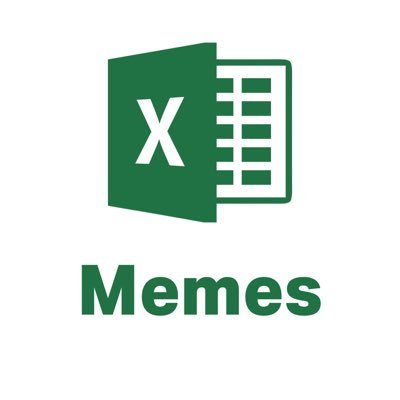

Crea codigo para **guardar** y **cargar** el DataFrame de `datos_dict` creada en las celdas anteriores en formato **pickle**

In [34]:
# COdigo guardar
# Guarda el DataFrame como un archivo pickle
datos_dict.to_pickle('datos_dict.pkl')


In [35]:
# Codigo para cargar
# 3. Cargar el DataFrame desde un archivo pickle
loaded_data_dict = pd.read_pickle('datos_dict.pkl')

# Verificar que los datos se han cargado correctamente
loaded_data_dict


,feature,description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
148,settlement_amount,The loan amount that the borrower has agreed t...
149,settlement_percentage,The settlement amount as a percentage of the p...
150,settlement_term,The number of months that the borrower will be...
151,NaN,NaN


## Tipos de Datos

Realiza las transformaciones o casteos (casting) que creas necesarios a tus datos de tal manera que el typo de dato sea adecuado. Al terminar recrea la tabla `column_types` con los nuevos tipos.

No olvides anotar tus justificaciones para recordar cuando te toque explicarlo.

In [36]:
# Manejos de tipos 1
# Casteo de tipos de datos en el DataFrame 'loans'

# Columnas con conteos o identificadores (entero)
loans['acc_now_delinq'] = loans['acc_now_delinq'].astype('int64')  # Número de cuentas en mora
loans['id'] = loans['id'].astype('int64')  # ID
loans['acc_open_past_24mths'] = loans['acc_open_past_24mths'].astype('int64')  # Cuentas abiertas en 24 meses
loans['delinq_2yrs'] = loans['delinq_2yrs'].astype('int64')  # Morosidad en 2 años
loans['chargeoff_within_12_mths'] = loans['chargeoff_within_12_mths'].astype('int64')  # Cuentas de cobranza
loans['collections_12_mths_ex_med'] = loans['collections_12_mths_ex_med'].astype('int64')  # Cuentas en cobranza
loans['num_accts_ever_120_pd'] = loans['num_accts_ever_120_pd'].astype('int64')  # Número de cuentas con 120 días de mora
loans['num_rev_accts'] = loans['num_rev_accts'].astype('int64')  # Número de cuentas revolventes
loans['num_tl_30dpd'] = loans['num_tl_30dpd'].astype('int64')  # Número de cuentas con 30 días de mora
loans['num_tl_90g_dpd_24m'] = loans['num_tl_90g_dpd_24m'].astype('int64')  # Cuentas con 90 días de mora
loans['num_tl_op_past_12m'] = loans['num_tl_op_past_12m'].astype('int64')  # Cuentas operativas en los últimos 12 meses
loans['open_acc'] = loans['open_acc'].astype('int64')  # Número de cuentas abiertas
loans['mort_acc'] = loans['mort_acc'].astype('int64')  # Número de cuentas hipotecarias
loans['pub_rec'] = loans['pub_rec'].astype('int64')  # Registros públicos
loans['pub_rec_bankruptcies'] = loans['pub_rec_bankruptcies'].astype('int64')  # Quiebras en registros públicos

# Columnas con números decimales (monetarios, tasas)
loans['all_util'] = loans['all_util'].astype('float64')  # Utilización total de crédito
loans['annual_inc'] = loans['annual_inc'].astype('float64')  # Ingreso anual
loans['annual_inc_joint'] = loans['annual_inc_joint'].astype('float64')  # Ingreso anual conjunto
loans['avg_cur_bal'] = loans['avg_cur_bal'].astype('float64')  # Balance promedio actual
loans['bc_open_to_buy'] = loans['bc_open_to_buy'].astype('float64')  # Límite de crédito disponible
loans['bc_util'] = loans['bc_util'].astype('float64')  # Utilización de crédito de tarjetas
loans['dti'] = loans['dti'].astype('float64')  # Ratio de deuda a ingreso
loans['dti_joint'] = loans['dti_joint'].astype('float64')  # Ratio de deuda a ingreso conjunto
loans['fico_range_high'] = loans['fico_range_high'].astype('float64')  # Rango alto del puntaje FICO
loans['fico_range_low'] = loans['fico_range_low'].astype('float64')  # Rango bajo del puntaje FICO
loans['funded_amnt'] = loans['funded_amnt'].astype('float64')  # Monto financiado
loans['funded_amnt_inv'] = loans['funded_amnt_inv'].astype('float64')  # Monto financiado por inversionistas
loans['installment'] = loans['installment'].astype('float64')  # Pago mensual
loans['last_pymnt_amnt'] = loans['last_pymnt_amnt'].astype('float64')  # Último monto de pago
loans['loan_amnt'] = loans['loan_amnt'].astype('float64')  # Monto del préstamo
loans['max_bal_bc'] = loans['max_bal_bc'].astype('float64')  # Máximo balance de tarjeta
loans['mo_sin_old_il_acct'] = loans['mo_sin_old_il_acct'].astype('float64')  # Meses sin cuenta de crédito antiguo
loans['mo_sin_old_rev_tl_op'] = loans['mo_sin_old_rev_tl_op'].astype('float64')  # Meses sin cuentas de crédito revolventes antiguas
loans['mo_sin_rcnt_rev_tl_op'] = loans['mo_sin_rcnt_rev_tl_op'].astype('float64')  # Meses desde cuentas revolventes recientes
loans['mo_sin_rcnt_tl'] = loans['mo_sin_rcnt_tl'].astype('float64')  # Meses desde cuentas recientes
loans['next_pymnt_d'] = pd.to_datetime(loans['next_pymnt_d'])  # Fecha del próximo pago
loans['out_prncp'] = loans['out_prncp'].astype('float64')  # Principal restante
loans['out_prncp_inv'] = loans['out_prncp_inv'].astype('float64')  # Principal restante para inversionistas
loans['tot_coll_amt'] = loans['tot_coll_amt'].astype('float64')  # Total de cuentas cobradas
loans['tot_cur_bal'] = loans['tot_cur_bal'].astype('float64')  # Total del balance actual
loans['tot_hi_cred_lim'] = loans['tot_hi_cred_lim'].astype('float64')  # Límite de crédito más alto
loans['total_acc'] = loans['total_acc'].astype('float64')  # Total de cuentas
loans['total_bal_ex_mort'] = loans['total_bal_ex_mort'].astype('float64')  # Total de balances excluyendo hipotecas
loans['total_bal_il'] = loans['total_bal_il'].astype('float64')  # Total de balances de crédito instalmentales
loans['total_bc_limit'] = loans['total_bc_limit'].astype('float64')  # Límite de crédito de tarjetas
loans['total_cu_tl'] = loans['total_cu_tl'].astype('float64')  # Total de cuentas de crédito
loans['total_il_high_credit_limit'] = loans['total_il_high_credit_limit'].astype('float64')  # Límite de crédito alto de cuentas instalmentales
loans['total_pymnt'] = loans['total_pymnt'].astype('float64')  # Total pagado
loans['total_pymnt_inv'] = loans['total_pymnt_inv'].astype('float64')  # Total pagado a inversionistas
loans['total_rec_int'] = loans['total_rec_int'].astype('float64')  # Total de interés recuperado
loans['total_rec_late_fee'] = loans['total_rec_late_fee'].astype('float64')  # Total de cargos por pagos atrasados
loans['total_rec_prncp'] = loans['total_rec_prncp'].astype('float64')  # Total de capital recuperado
loans['total_rev_hi_lim'] = loans['total_rev_hi_lim'].astype('float64')  # Límite alto de crédito revolvente
loans['settlement_amount'] = loans['settlement_amount'].astype('float64')  # Monto de liquidación
loans['settlement_percentage'] = loans['settlement_percentage'].astype('float64')  # Porcentaje de liquidación

# Cambiando las columnas categóricas a tipo string
loans['addr_state'] = loans['addr_state'].astype('string')  # Estado de la dirección
loans['application_type'] = loans['application_type'].astype('string')  # Tipo de solicitud
loans['grade'] = loans['grade'].astype('string')  # Calificación del préstamo
loans['home_ownership'] = loans['home_ownership'].astype('string')  # Propiedad de vivienda
loans['initial_list_status'] = loans['initial_list_status'].astype('string')  # Estado inicial de la lista
loans['purpose'] = loans['purpose'].astype('string')  # Propósito del préstamo
loans['sub_grade'] = loans['sub_grade'].astype('string')  # Subcalificación
loans['term'] = loans['term'].astype('string')  # Término del préstamo
loans['verification_status'] = loans['verification_status'].astype('string')  # Estado de verificación
loans['zip_code'] = loans['zip_code'].astype('string')  # Código postal
loans['hardship_flag'] = loans['hardship_flag'].astype('string')  # Indica si hay dificultades financieras
loans['debt_settlement_flag'] = loans['debt_settlement_flag'].astype('string')  # Indica si hay liquidación de deuda
loans['disbursement_method'] = loans['disbursement_method'].astype('string')  # Método de desembolso




<ipython-input-36-b146658a95a7>:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loans['next_pymnt_d'] = pd.to_datetime(loans['next_pymnt_d'])  # Fecha del próximo pago


In [37]:
# Obtener los tipos de datos
dtypes = loans.dtypes

# Crear un DataFrame a partir de la serie de tipos de datos
column_types = pd.DataFrame(dtypes).reset_index()

# Renombrar las columnas del nuevo DataFrame
column_types.columns = ['Nombre de Columna', 'Tipo de Dato']

# Mostrar la tabla con nombres de columna y tipos de dato
print(column_types)


         Nombre de Columna Tipo de Dato
0               Unnamed: 0        int64
1                       id        int64
2                member_id      float64
3                loan_amnt      float64
4              funded_amnt      float64
..                     ...          ...
146      settlement_status       object
147        settlement_date       object
148      settlement_amount      float64
149  settlement_percentage      float64
150        settlement_term      float64

[151 rows x 2 columns]


## Manejo de NaNs o missings

Maneja los datos de tipos missing. Elije una estrategia adecuada dependiendo del tipo de dato que le asignaste a la columna.


Crea codigo para **guardar** y **cargar** un archivo JSON en el que se guarde la `estrategia` y `valor` que utilizaste para **imputar**. Por ejemplo: Si hay una columna que se llama `columna 3` y utilizaste la estrategia de imputacion de media, y existe otra llamada `columna 4` y  elegiste la palabra 'missing' el JSON debera contener:  
  
 `{'columna 3':{'estrategia':'mean', 'valor':3.4}, 'columna 4':{'estrategia':'identificador', 'valor':'missing'}}`  

 De tal manera que para cada columna que tenga un metodo de imputacion apunte a otro diccionario donde el **key** `estrategia` describa de manera sencilla el metodo, y el **key** `valor` el valor usado. En general:   
 `{'nombre de la columna':{'estrategia':'descripcion de estrategia', 'valor':'valor utilizado'}}`.


De utilizar mas de un metodo puedes anidarlos en una lista  
  `[{...},{...}]`.  

Incluso si la columna utilizada no sufrio imputacion, es necesario que la agregues al JSON.

La idea es que cualquier otra persona pueda cargar el el archivo JSON con tu funcion, entender que hiciste y replicarlo facilmente. No existe solo una respuesta correcta, pero tendras que justificar y explicar tus deciciones.

### Imputacion

In [38]:
# Tu codigo aqui
import json

imputation_strategy = {}

# Reemplazar NaN por cero en columnas numéricas (int y float)
for column in loans.columns:
    if loans[column].dtype in ['int64', 'float64']:
        # Guardar estrategia y valor en el diccionario
        valor_imputado = 0
        imputation_strategy[column] = {
            'estrategia': 'zero',
            'valor': valor_imputado
        }
        # Reemplazar NaN por cero
        loans[column].fillna(valor_imputado, inplace=True)

# Guardar el diccionario en un archivo JSON
with open('imputation_strategy.json', 'w') as json_file:
    json.dump(imputation_strategy, json_file)

# Función para cargar la estrategia de imputación desde el JSON
def cargar_estrategia_imputacion(archivo_json):
    with open(archivo_json, 'r') as json_file:
        estrategia = json.load(json_file)
    return estrategia

# Cargar la estrategia desde el archivo JSON
estrategia_cargada = cargar_estrategia_imputacion('imputation_strategy.json')

# Mostrar la estrategia cargada
print(estrategia_cargada)


{'Unnamed: 0': {'estrategia': 'zero', 'valor': 0}, 'id': {'estrategia': 'zero', 'valor': 0}, 'member_id': {'estrategia': 'zero', 'valor': 0}, 'loan_amnt': {'estrategia': 'zero', 'valor': 0}, 'funded_amnt': {'estrategia': 'zero', 'valor': 0}, 'funded_amnt_inv': {'estrategia': 'zero', 'valor': 0}, 'int_rate': {'estrategia': 'zero', 'valor': 0}, 'installment': {'estrategia': 'zero', 'valor': 0}, 'annual_inc': {'estrategia': 'zero', 'valor': 0}, 'dti': {'estrategia': 'zero', 'valor': 0}, 'delinq_2yrs': {'estrategia': 'zero', 'valor': 0}, 'fico_range_low': {'estrategia': 'zero', 'valor': 0}, 'fico_range_high': {'estrategia': 'zero', 'valor': 0}, 'inq_last_6mths': {'estrategia': 'zero', 'valor': 0}, 'mths_since_last_delinq': {'estrategia': 'zero', 'valor': 0}, 'mths_since_last_record': {'estrategia': 'zero', 'valor': 0}, 'open_acc': {'estrategia': 'zero', 'valor': 0}, 'pub_rec': {'estrategia': 'zero', 'valor': 0}, 'revol_bal': {'estrategia': 'zero', 'valor': 0}, 'revol_util': {'estrategia': 

<ipython-input-38-e3f8087df670>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loans[column].fillna(valor_imputado, inplace=True)


**Nota: El tipo de dato lo asigné según la descripción de la columna, si eran cosas contables puse int64, si eran cosas contables con decimales puse float64 y si eran cosas con palabras en lugar de números, asigné el tipo de dato string.**

### Codigo para salvar y cargar JSONs